<a href="https://colab.research.google.com/github/washof/2024_Geoinformatique_I/blob/main/Geoinformatique_I/IP/Exercices_IP/S6_IP_exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 6 - Données tabulaire

Dans la démonstration, nous vous avons montré comment extraire 5 lignes et les écrire dans un nouveau fichier CSV. Ici, nous vous fournissons des lignes de données qui encodent des observations météorologiques de surface enregistrées toutes les heures. Les données s'étendent de janvier à août.

Que faire si nous voulons extraire les données de janvier, février et mars et les enregistrer dans des fichiers plus petits séparés par mois ?

Nous vous proposons ici quelques fonctions permettant d'extraire les indices de la première et de la dernière instance des données d'un mois donné dans les données tabulaires. Il n'est pas nécessaire de modifier quoi que ce soit dans ces fonctions ; dans cet exercice, vous devez simplement enregistrer les fichiers mensuels sur la base des indices de sortie.

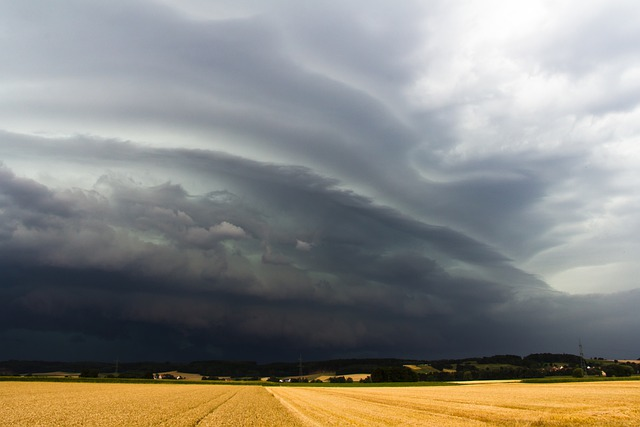

Image par <a href="https://pixabay.com/users/dertobisturmjagd-7096811/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=3176544">Tobias Hämmer</a> de <a href="https://pixabay.com//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=3176544">Pixabay</a>

In [ ]:
pip install pooch

  Obtaining dependency information for pooch from https://files.pythonhosted.org/packages/1a/a5/5174dac3957ac412e80a00f30b6507031fcab7000afc9ea0ac413bddcff2/pooch-1.8.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 749.7 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import csv
import pandas as pd
import numpy as np
import pooch
import urllib.request

In [ ]:
#url = 'https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/ETDZdgCkWbZLiv_LP6HKCOAB2NP7H0tUTLlP_stknqQHGw?e=2lFo1x'

datafile = pooch.retrieve('https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/ETDZdgCkWbZLiv_LP6HKCOAB2NP7H0tUTLlP_stknqQHGw?download=1',
                          known_hash='c7676360997870d00a0da139c80fb1b6d26e1f96050e03f2fed75b921beb4771')

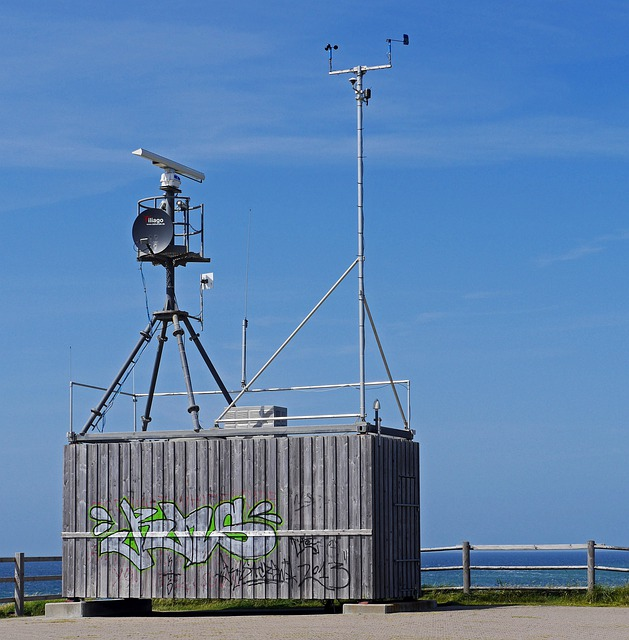

Image par <a href="https://pixabay.com/users/hpgruesen-2204343/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=2373839">Erich Westendarp</a> de <a href="https://pixabay.com//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=2373839">Pixabay</a>

Complétez le code ci-dessous avec le nom de fichier approprié :

In [ ]:
row = [] # Initialise ligne à une liste vide
with open(___________, 'r') as fh:
  reader = csv.reader(fh)
  for info in reader:
    row.append(info)

Vous pouvez simplement exécuter les deux cellules suivantes :

In [ ]:
def output_monthindices(month=None) :
  """
  Cette fonction prend une chaîne de caractères "month" en entrée (par exemple, January)
  et produit les premier et dernier indices de ce mois
  """
  test = [rowobj[1].split(' ')[0].split('-')[1] for rowobj in row[1:]]
  truefalse = []
  for obj in test :
    if obj==month :
      truefalse.append(obj)
    else :
      truefalse.append(np.nan)
  return pd.Series(truefalse).first_valid_index(),pd.Series(truefalse).last_valid_index()

In [ ]:
# Ici, nous produisons le premier et le dernier indice de Jan/Feb/Mar
Jan_index = output_monthindices(month='01')
Feb_index = output_monthindices(month='02')
Mar_index = output_monthindices(month='03')

Ici, nous allons extraire des portions de la liste `row` (la ligne) avec les valeurs d'index mensuelles que nous avons.

Ecrivons ces extraits dans trois nouveaux fichiers : `jan.csv`, `feb.csv`, `mar.csv` en utilisant une boucle.

In [ ]:
savefile = [_,_,_] # Liste contenant les noms de fichiers
indices = [Jan_index, Feb_index, Mar_index]
for i in range(_):
  with open(__, 'w') as fh:
    writer = csv.writer(fh)
    for ____ in range(indices[_][0],indices[_][1]):
      writer.writerow(row[____])

In [ ]:
#@title réponse
savefile = ['jan.csv','feb.csv','mar.csv']
indices = [Jan_index, Feb_index, Mar_index]
for i in range(3):
  with open(savefile[i], 'w') as fh:
    writer = csv.writer(fh)
    for num in range(indices[i][0],indices[i][1]):
      writer.writerow(row[num])

Vérifions que nous avons bien écrit nos données météorologiques dans le fichier approprié. Il suffit d'exécuter la cellule ci-dessous pour vérifier 😃

In [ ]:
#@title Imprimons les dates du mois de mars
df = pd.read_csv(savefile[2]) # Lit le fichier en utilisant pandas
df.head(3) # Imprime les trois premières lignes du fichier

Félicitations ! Vous venez de terminer quelques tâches de programmation avec Python !
Vous êtes enthousiaste ? Ne vous arrêtez pas en si bon chemin, nous avons d'autres exercices pour vous dans la section suivante !
Notre prochain exercice portera sur notre système solaire ! 🪐